# ML_Models: 

Table of Content

1. Data Preprocessing
2. Model Construction
    * Classifier:
        * Decision Tree
        * Random Forest
    * Nueral Networks (4 models)
3. Model Evaluation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import pickle

import torch
from torch import nn
from torch import optim
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import time
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from scipy import stats
from matplotlib import rc

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 

import matplotlib.pyplot as plt
import numpy as np

# Preprocess the data

In [2]:
# Load the data
data = pd.read_csv('data/generated_data.csv')

In [3]:
# Check the data
nond_data = data[['count', 'n_nond', 'm_nond', 'a_nond', 'b_nond', 'theta_nond', 'G1_nond', 'P1_nond', 'G2_nond',
             'P2_nond', 'G3_nond', 'P3_nond', 'G4_nond', 'P4_nond', 'G5_nond', 'P5_nond']]
nond_data.describe()

,count,n_nond,m_nond,a_nond,b_nond,theta_nond,G1_nond,P1_nond,G2_nond,P2_nond,G3_nond,P3_nond,G4_nond,P4_nond,G5_nond,P5_nond
count,130957.00000,130957.000000,130957.000000,130957.000000,130957.000000,130957.000000,130957.000000,130957.000000,130957.000000,130957.000000,130957.000000,130957.000000,130957.000000,130957.000000,130957.000000,130957.000000
mean,1.75918,2.913591,2.449545,1.358914,1.120089,1.251722,1.216378,1.113970,-0.549398,-0.226793,-0.530207,-0.749391,-1.029338,-1.044756,-1.304021,-1.304021
std,1.05103,1.043716,1.028783,0.766627,0.977828,1.149043,0.865989,0.875134,1.128094,1.491514,1.374352,1.066393,0.985773,0.949859,0.541842,0.541842
min,1.00000,1.000000,0.900000,0.177778,0.177778,0.106667,0.156385,0.156385,-2.631579,-2.631579,-2.631579,-2.631579,-2.631579,-2.631579,-2.631579,-2.631579
25%,1.00000,2.200000,1.600000,0.852632,0.488893,0.400851,0.502002,0.472342,-1.481481,-1.481481,-1.481481,-1.481481,-1.481481,-1.481481,-1.481481,-1.481481
50%,1.00000,3.300000,2.200000,1.330616,0.816327,1.000417,1.052753,0.739153,-0.666667,-0.666667,-0.816327,-0.816327,-1.052632,-1.052632,-1.075269,-1.075269
75%,3.00000,4.000000,3.400000,1.633333,1.421053,1.579605,1.642853,1.515072,0.444402,1.425704,0.698280,0.329932,-0.816327,-0.816327,-0.816327,-0.816327
max,4.00000,4.100000,4.100000,7.500000,7.500000,5.625000,4.998123,4.998123,4.696894,4.696894,2.957803,2.541759,2.541538,2.157907,-0.657895,-0.657895


In [4]:
# Seprated data into 5 sub-datasets
data_1 = data[data['count'] == 1][['n', 'm', 'a1', 'b1', 'theta_a1', 'theta_b1', 'k1', 'G1', 'P1', 'count']]
nond_data_1 = data[data['count'] == 1][['count', 'n_nond', 'm_nond', 'a_nond', 'b_nond', 'theta_nond', 'G1_nond', 'P1_nond']]
# data_1.to_csv('data/data_1.csv', index=False)
# nond_data_1.to_csv('data/nond_data_1.csv', index=False)

data_2 = data[data['count'] == 2][['n', 'm', 'a1', 'b1', 'theta_a1', 'theta_b1', 'k1', 'G1', 'P1', 'G2', 'P2', 'count']]
nond_data_2 = data[data['count'] == 2][['count', 'n_nond', 'm_nond', 'a_nond', 'b_nond', 'theta_nond', 'G1_nond', 'P1_nond', "G2_nond", 'P2_nond']]
# data_2.to_csv('data/data_2.csv', index=False)
# nond_data_2.to_csv('data/nond_data_2.csv', index=False)

data_3 = data[data['count'] == 3][['n', 'm', 'a1', 'b1', 'theta_a1', 'theta_b1', 'k1', 'G1', 'P1', 'G2', 'P2', 'G3', 'P3','count']]
nond_data_3 = data[data['count'] == 3][['count', 'n_nond', 'm_nond', 'a_nond', 'b_nond', 'theta_nond', 'G1_nond', 'P1_nond', "G2_nond", 'P2_nond', "G3_nond", 'P3_nond']]
# data_3.to_csv('data/data_3.csv', index=False)
# nond_data_3.to_csv('data/nond_data_3.csv', index=False)

data_4 = data[data['count'] == 4][['n', 'm', 'a1', 'b1', 'theta_a1', 'theta_b1', 'k1', 'G1', 'P1', 'G2', 'P2', 'G3', 'P3', 'G4', 'P4','count']]
nond_data_4 = data[data['count'] == 4][['count', 'n_nond', 'm_nond', 'a_nond', 'b_nond', 'theta_nond', 'G1_nond', 'P1_nond', "G2_nond", 'P2_nond', "G3_nond", 'P3_nond', "G4_nond", 'P4_nond']]
# data_4.to_csv('data/data_4.csv', index=False)
# nond_data_4.to_csv('data/nond_data_4.csv', index=False)

nond_data_count = data[['n_nond', 'm_nond', 'a_nond', 'b_nond', 'theta_nond', 'count']]
#nond_data_count.to_csv('data/nond_data_count.csv', index=False)

In [5]:
# Remove any unreasonable data from each dataset
nond_data_1 = nond_data_1[(nond_data_1 >= 0).all(axis=1)]
print(nond_data_1.shape)
nond_data_2 = nond_data_2[(nond_data_2 >= 0).all(axis=1)]
print(nond_data_2.shape)
nond_data_3 = nond_data_3[(nond_data_3 >= 0).all(axis=1)]
print(nond_data_3.shape)
nond_data_4 = nond_data_4[(nond_data_4 >= 0).all(axis=1)]
print(nond_data_4.shape)

(79390, 8)
(16221, 10)
(22839, 12)
(12507, 14)


In [6]:
nond_data_1.shape[0] + nond_data_2.shape[0] +nond_data_3.shape[0]+nond_data_4.shape[0]

130957

## Build Machine Learning Classifier Models

### 1. Decision Tree

In [7]:
# Extract dependent and independent variables
X = nond_data_count[['n_nond', 'm_nond', 'a_nond', 'b_nond', 'theta_nond']]
y = nond_data_count['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Build the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Get predicted values
y_pred = dt_model.predict(X_test)

# Obtain evaluation metrics for this model 
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

with open('model/dt.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

Accuracy: 0.8881337813072694
              precision    recall  f1-score   support

           1       0.96      0.96      0.96      7922
           2       0.71      0.72      0.72      1662
           3       0.81      0.82      0.81      2276
           4       0.82      0.81      0.82      1236

    accuracy                           0.89     13096
   macro avg       0.83      0.83      0.83     13096
weighted avg       0.89      0.89      0.89     13096



### 2. Random Forest

In [8]:
# Build the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Get predicted values
y_pred = rf_model.predict(X_test)

# Obtain evaluation metrics for this model 
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

with open('model/rf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

Accuracy: 0.9085980452046426
              precision    recall  f1-score   support

           1       0.97      0.96      0.97      7922
           2       0.77      0.78      0.78      1662
           3       0.84      0.85      0.84      2276
           4       0.86      0.84      0.85      1236

    accuracy                           0.91     13096
   macro avg       0.86      0.86      0.86     13096
weighted avg       0.91      0.91      0.91     13096



### 3. Feature Importance

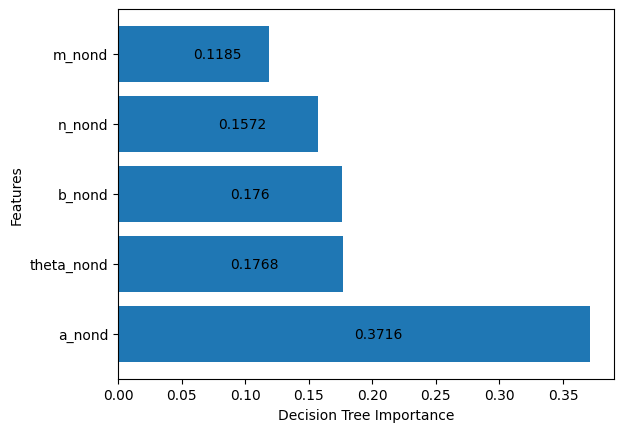

In [9]:
# Decision Tree
feature_list = X.columns
dt_importance = dt_model.feature_importances_
sorted_dt_indices = sorted(range(len(dt_importance)), key=lambda k: dt_importance[k], reverse=True)

# Sort the feature impotance 
sorted_dt_importance = [dt_importance[index] for index in sorted_dt_indices]
sorted_dt_feature = [feature_list[index] for index in sorted_dt_indices]

# Plotting the horizontal bar chart
fig, ax = plt.subplots()
bars = ax.barh(sorted_dt_feature, sorted_dt_importance)
plt.xlabel('Decision Tree Importance')
plt.ylabel('Features')

# Adding values on the right side of each bar
for bar, val in zip(bars, sorted_dt_importance):
    plt.text(bar.get_width()/2, bar.get_y() + bar.get_height() / 2, round(val, 4), va='center')

plt.show()


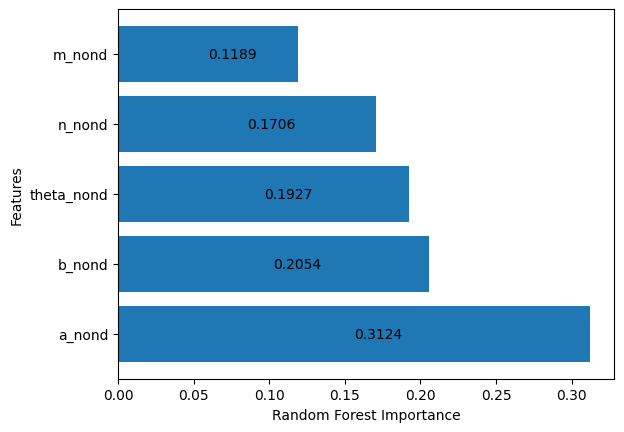

In [10]:
# Random Forest
feature_list = X.columns
rf_importance = rf_model.feature_importances_
sorted_rf_indices = sorted(range(len(rf_importance)), key=lambda k: rf_importance[k], reverse=True)

# Sort the feature impotance 
sorted_rf_importance = [rf_importance[index] for index in sorted_rf_indices]
sorted_rf_feature = [feature_list[index] for index in sorted_rf_indices]

# Plotting the horizontal bar chart
fig, ax = plt.subplots()
bars = ax.barh(sorted_rf_feature, sorted_rf_importance)
plt.xlabel('Random Forest Importance')
plt.ylabel('Features')

# Adding values on the right side of each bar
for bar, val in zip(bars, sorted_rf_importance):
    plt.text(bar.get_width()/2, bar.get_y() + bar.get_height() / 2, round(val, 4), va='center')

plt.show()

## Build Neural Network Models for different steady states

In [11]:
# Data normalization function
def norm(x, train_stats):
  return (x - train_stats['mean']) / train_stats['std']

# Build neural network model
def ann_model(X, y, model_path):
    # Split the data
    train_dataset, test_dataset, train_labels, test_labels = train_test_split(X,y,test_size = 0.1, random_state = 0)
    train_stats = train_dataset.describe()
    train_stats = train_stats.transpose()

    # Normalize the data
    normed_train_data = norm(train_dataset, train_stats)
    normed_test_data = norm(test_dataset, train_stats)
  
    print("inputs and outputs are ready")
    
    # Construct the structure of the model
    train_norm=torch.Tensor(normed_train_data.to_numpy(np.float32))
    test_norm=torch.Tensor(normed_test_data.to_numpy(np.float32))
    train_labels_tensor=torch.Tensor(train_labels.to_numpy(np.float32))
    test_labels_tensor=torch.Tensor(test_labels.to_numpy(np.float32))

    in_length=X.shape[1]
    out_length=y.shape[1]

    net = nn.Sequential(nn.Linear(in_length, 64),
                        nn.ReLU(),
                        nn.Linear(64, 32),
                        nn.ReLU(),
                        nn.Linear(32, 16),
                        nn.ReLU(),
                        nn.Linear(16, out_length))


    optimizer = torch.optim.Adam(net.parameters(), lr=0.0004)
    loss_func = torch.nn.L1Loss()
    loss_func = torch.nn.MSELoss() 

    # trian the model
    print("start training")

    epochs=20000
    EPOCH=[i*100 for i in range (0,epochs//100)]
    mse_loss=[0 for i in range (0,epochs//100)]
    mae_loss=[0 for i in range (0,epochs//100)]
    r2_change=[0 for i in range (0,epochs//100)]

    T1=time.time()#timer

    for e in range(epochs):
        prediction = net(train_norm)     # input x and predict based on x
        
        loss = loss_func(prediction, train_labels_tensor)  
        
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()
        
        if e%100==0:
            r2_change[e//100]=r2_score(train_labels,prediction.cpu().detach().numpy())
            mse_loss[e//100]=mean_squared_error(train_labels,prediction.cpu().detach().numpy())
            mae_loss[e//100]=mean_absolute_error(train_labels,prediction.cpu().detach().numpy())
        
        if e%100==0:
            print('\rprogress of training:{:.2f}%'.format((e/epochs)*100),end='')
            
        if e==epochs-1:
            print('\rprogress of training:100.00%')

    T2=time.time()#timer

    # Save the model
    torch.save(net, model_path)

    # Load the model
    net = torch.load(model_path)

    # Get the predicted values
    train_predictions = net(train_norm)
    train_predictions = train_predictions.cpu().detach().numpy()
    test_predictions = net(test_norm)
    test_predictions = test_predictions.cpu().detach().numpy()

    # Obtain evaluation metrics for this model
    r2test=r2_score(test_labels,test_predictions)
    r2train = r2_score(train_labels,train_predictions)
    MSE_train=mean_squared_error(train_labels,train_predictions)
    MAE_train=mean_absolute_error(train_labels,train_predictions)
    MSE_test=mean_squared_error(test_labels,test_predictions)
    MAE_test=mean_absolute_error(test_labels,test_predictions)

    # Print the model performance 
    print('Mean square error (train):',MSE_train)
    print('Mean absolute error (train):',MAE_train)
    print('Mean square error (test):',MSE_test)
    print('Mean absolute error (test):',MAE_test)
    print('Train score:',r2train)
    print('Test score:',r2test)

    print('Time consumed: %s s'%(T2-T1))
    minute=float(T2-T1)/60
    print('Time consumed: %f min'%(minute))

    # Plot the predicted values vs. true values
    column_names = test_labels.columns
    np_test_labels = np.array(test_labels)
    num_columns = test_predictions.shape[1]

    # Create subplots
    if y.shape[1] == 2:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    elif y.shape[1] == 4:
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
    elif y.shape[1] == 6:
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 16))
    elif y.shape[1] == 8:
        fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 16))

    fig.suptitle('Predicted vs. True', fontsize=30)

    # Flatten the 2D array of subplots into a 1D array for easier indexing
    axes = axes.flatten()

    # Plot each pair of predictions and labels
    for i in range(num_columns):
        ax = axes[i]
        ax.scatter(np_test_labels[:, i], test_predictions[:, i], color='blue', alpha=0.5)
        ax.plot([min(np_test_labels[:, i]), max(np_test_labels[:, i])], [min(np_test_labels[:, i]), max(np_test_labels[:, i])], color='red', linestyle='--', linewidth=2)
        ax.set_title(f'{column_names[i]}', fontsize=30)
        ax.set_xlabel('True', fontsize=26)
        ax.set_ylabel('Predicted', fontsize=26) 

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

inputs and outputs are ready
start training
progress of training:100.00%
Mean square error (train): 0.010833586535448986
Mean absolute error (train): 0.03959976339029865
Mean square error (test): 0.01733662629069662
Mean absolute error (test): 0.044093104062374336
Train score: 0.989222763925952
Test score: 0.9827177187225578
Time consumed: 289.85343885421753 s
Time consumed: 4.830891 min


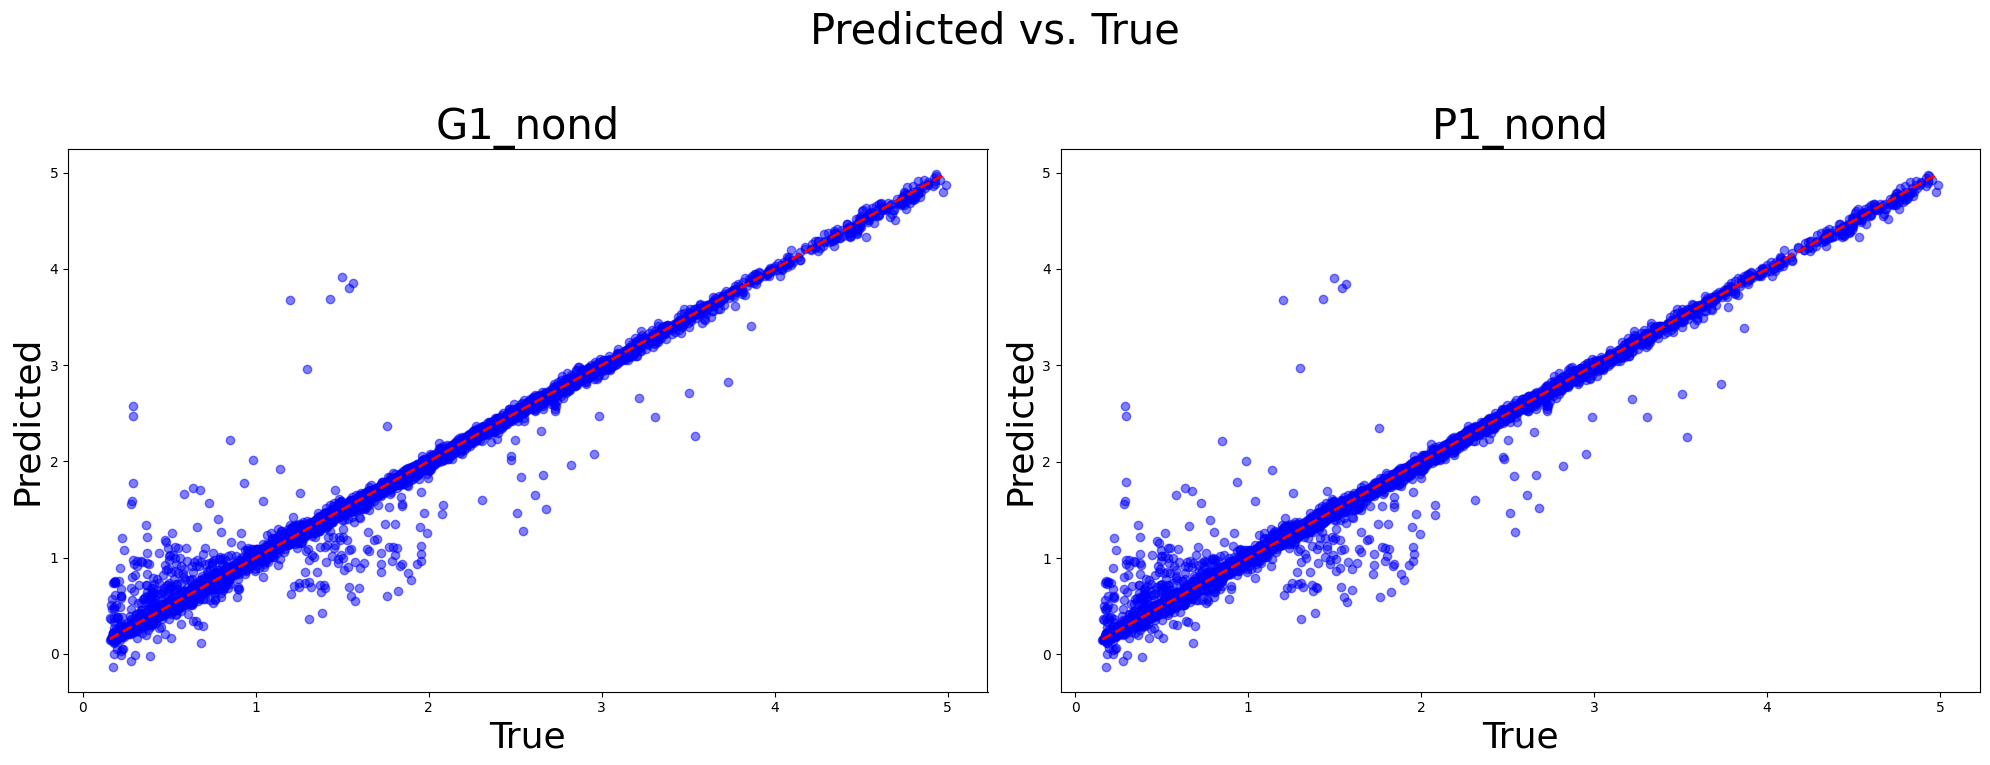

In [12]:
# Train model using dataset with 1 steady state
X_1 = nond_data_1[['n_nond', 'm_nond', 'a_nond', 'b_nond', 'theta_nond']]
y_1 = nond_data_1[['G1_nond', 'P1_nond']]
ann_model(X_1, y_1, 'model/ann_1.pt')

inputs and outputs are ready
start training
progress of training:100.00%
Mean square error (train): 0.08774425340072975
Mean absolute error (train): 0.2025763027227091
Mean square error (test): 0.13009504170491792
Mean absolute error (test): 0.24150831348714213
Train score: 0.6594450948058476
Test score: 0.5145084581352419
Time consumed: 59.06483197212219 s
Time consumed: 0.984414 min


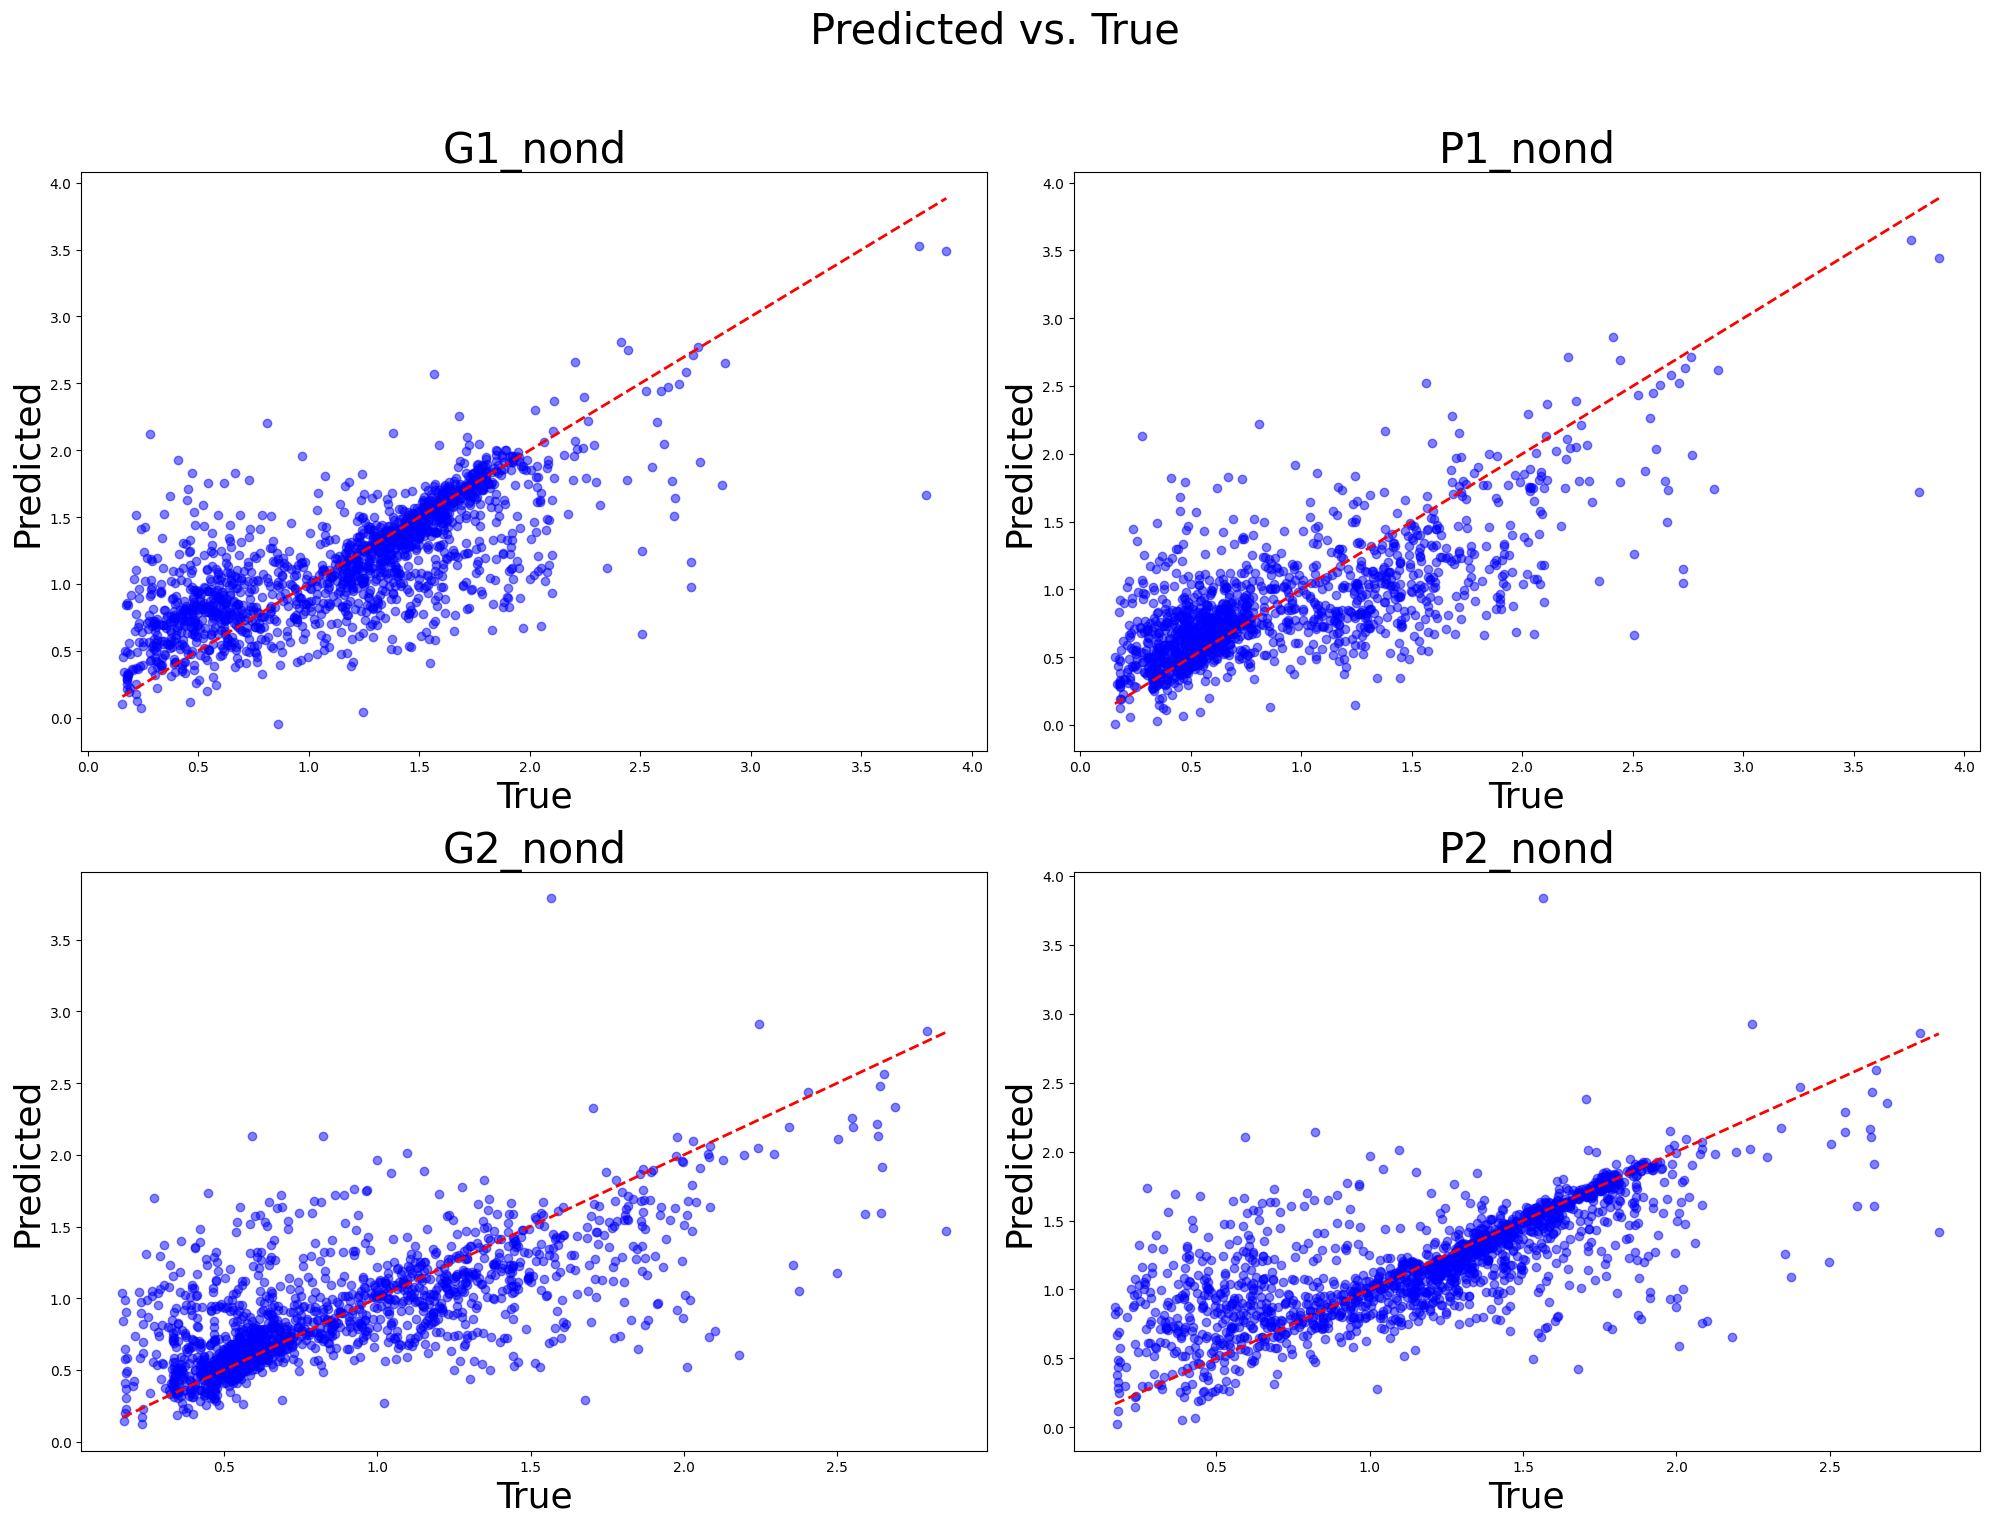

In [13]:
# Train model using dataset with 2 steady states
X_2 = nond_data_2[['n_nond', 'm_nond', 'a_nond', 'b_nond', 'theta_nond']]
y_2 = nond_data_2[['G1_nond', 'P1_nond', 'G2_nond', 'P2_nond']]
ann_model(X_2, y_2, 'model/ann_2.pt')

inputs and outputs are ready
start training
progress of training:100.00%
Mean square error (train): 0.07052574518381861
Mean absolute error (train): 0.15946361330873846
Mean square error (test): 0.08126461483351807
Mean absolute error (test): 0.1704985717563118
Train score: 0.6242806351011092
Test score: 0.5737676190510425
Time consumed: 84.28816390037537 s
Time consumed: 1.404803 min


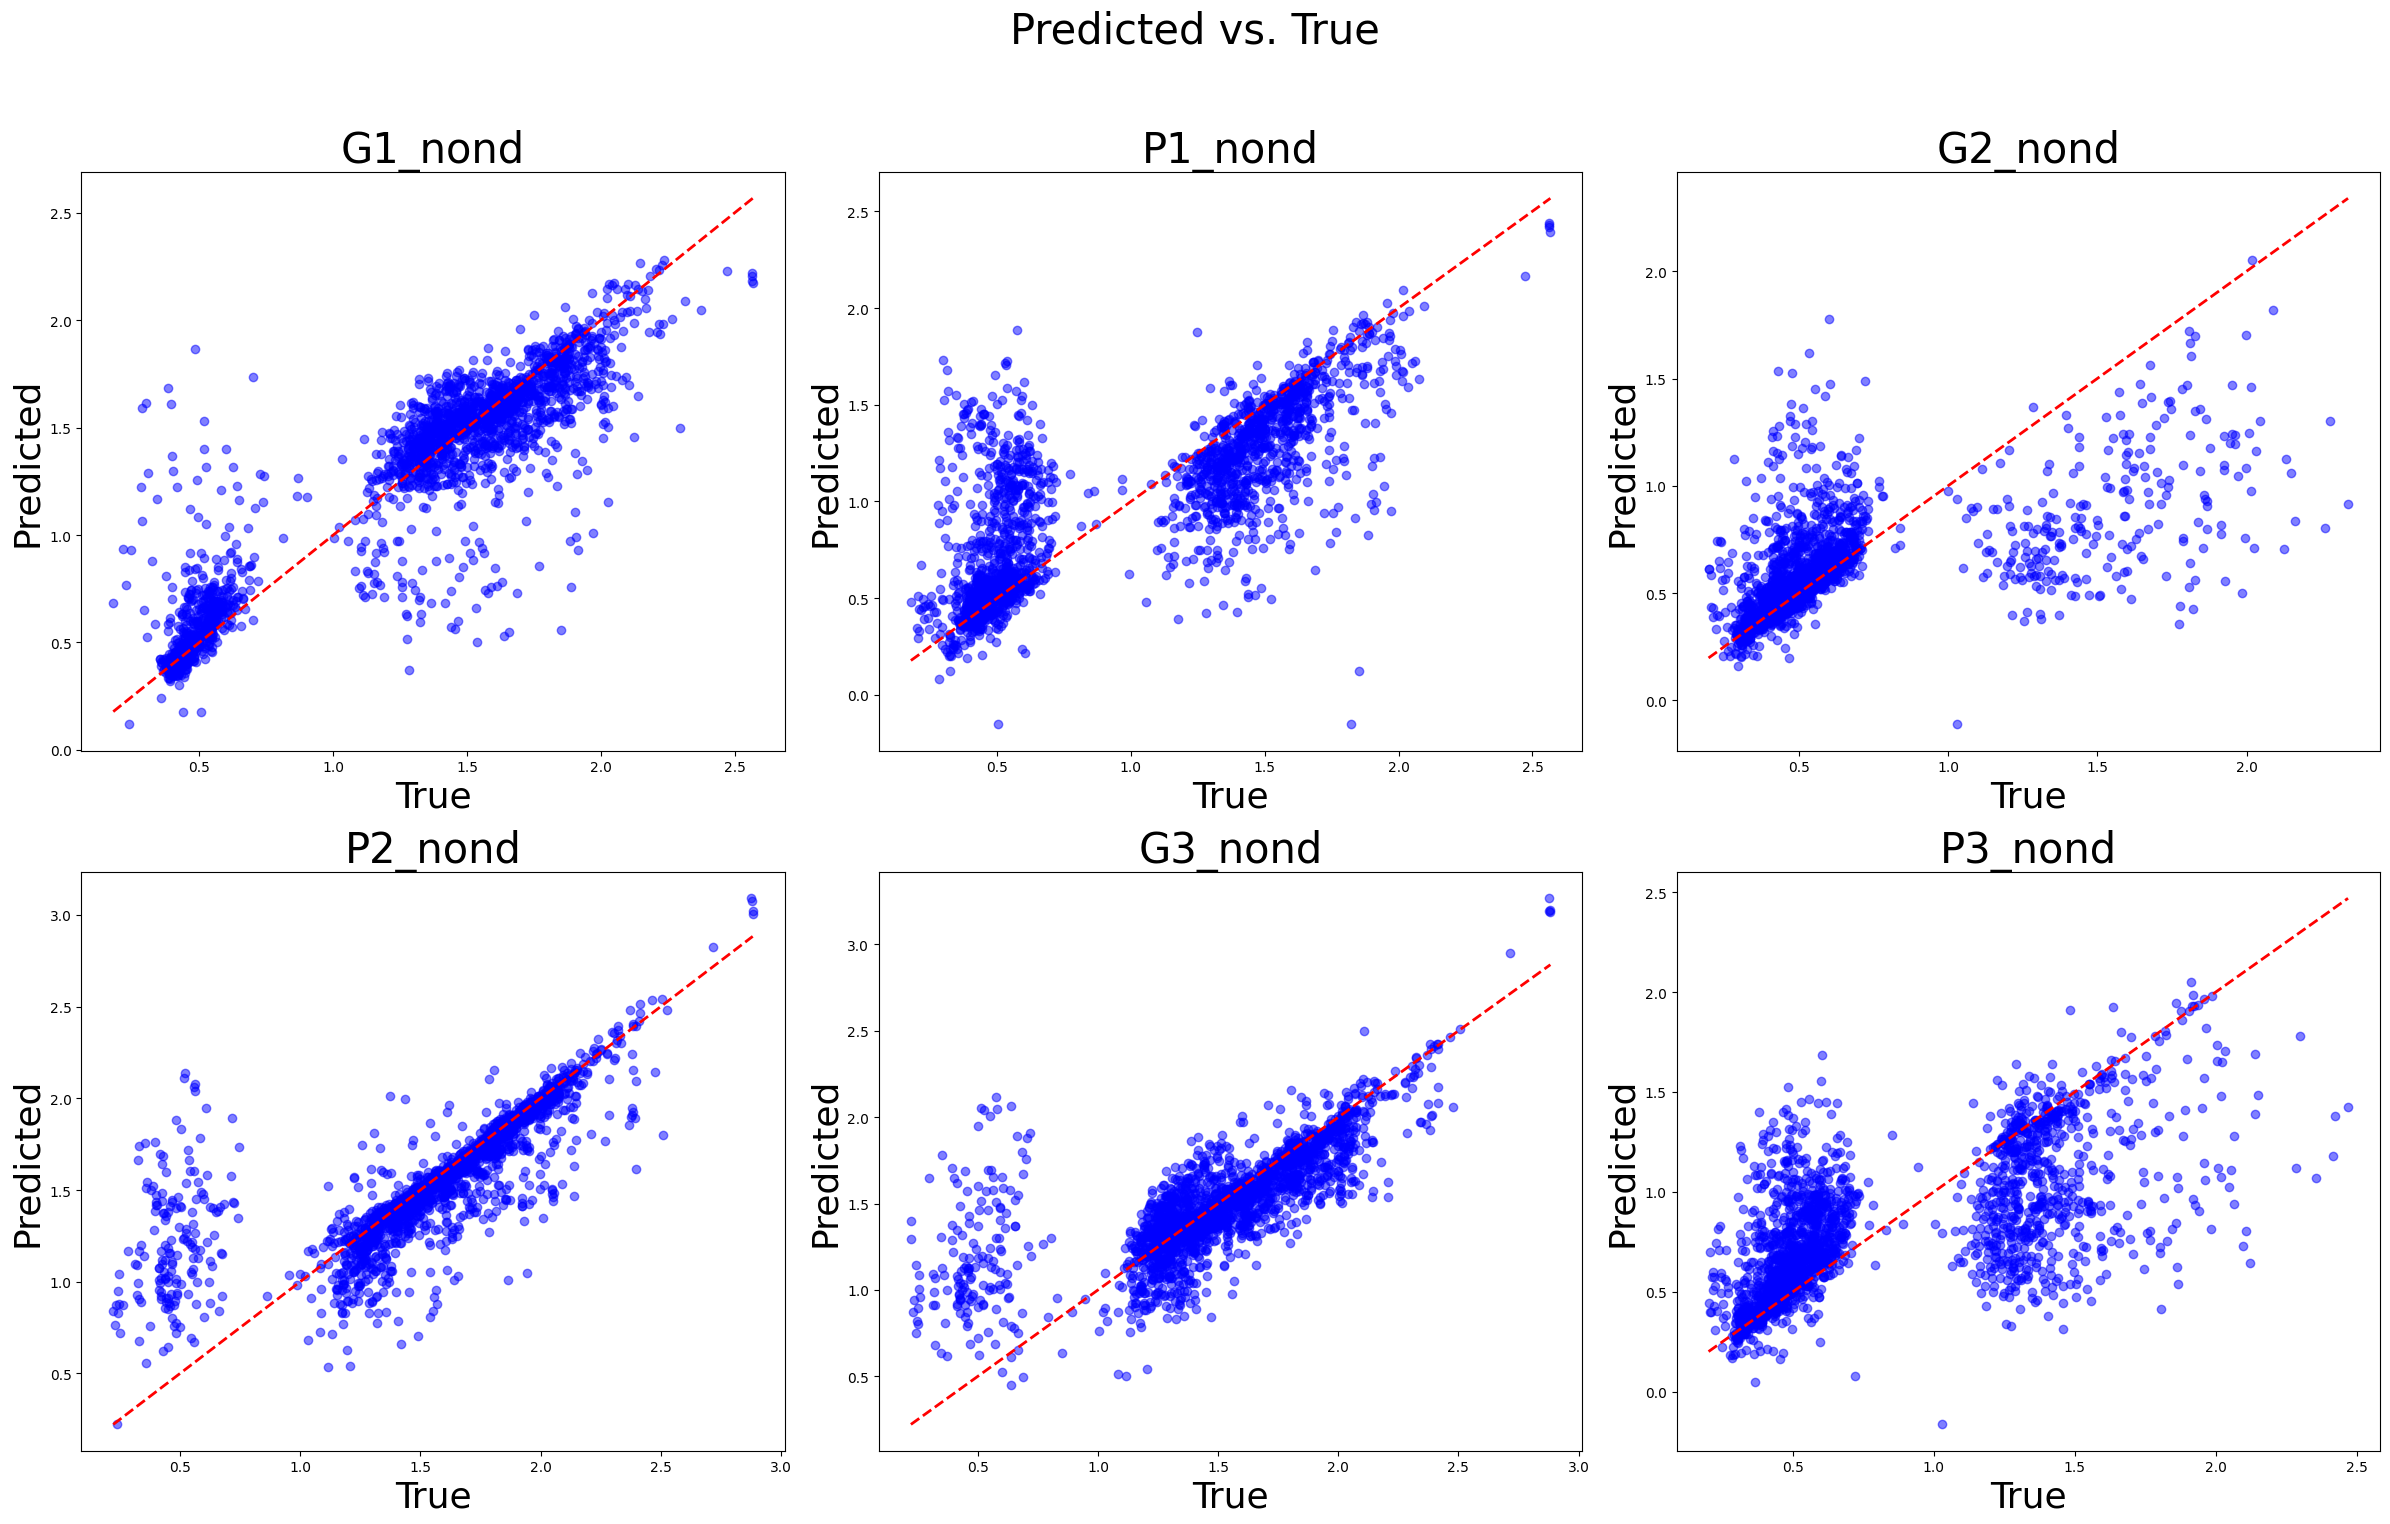

In [14]:
# Train model using dataset with 3 steady states
X_3 = nond_data_3[['n_nond', 'm_nond', 'a_nond', 'b_nond', 'theta_nond']]
y_3 = nond_data_3[['G1_nond', 'P1_nond', 'G2_nond', 'P2_nond', 'G3_nond', 'P3_nond']]
ann_model(X_3, y_3, 'model/ann_3.pt')

inputs and outputs are ready
start training
progress of training:100.00%
Mean square error (train): 0.04524438643962125
Mean absolute error (train): 0.09072020408540601
Mean square error (test): 0.06616457753974778
Mean absolute error (test): 0.11115642136475473
Train score: 0.6932731325444559
Test score: 0.5642855116264193
Time consumed: 49.3673837184906 s
Time consumed: 0.822790 min


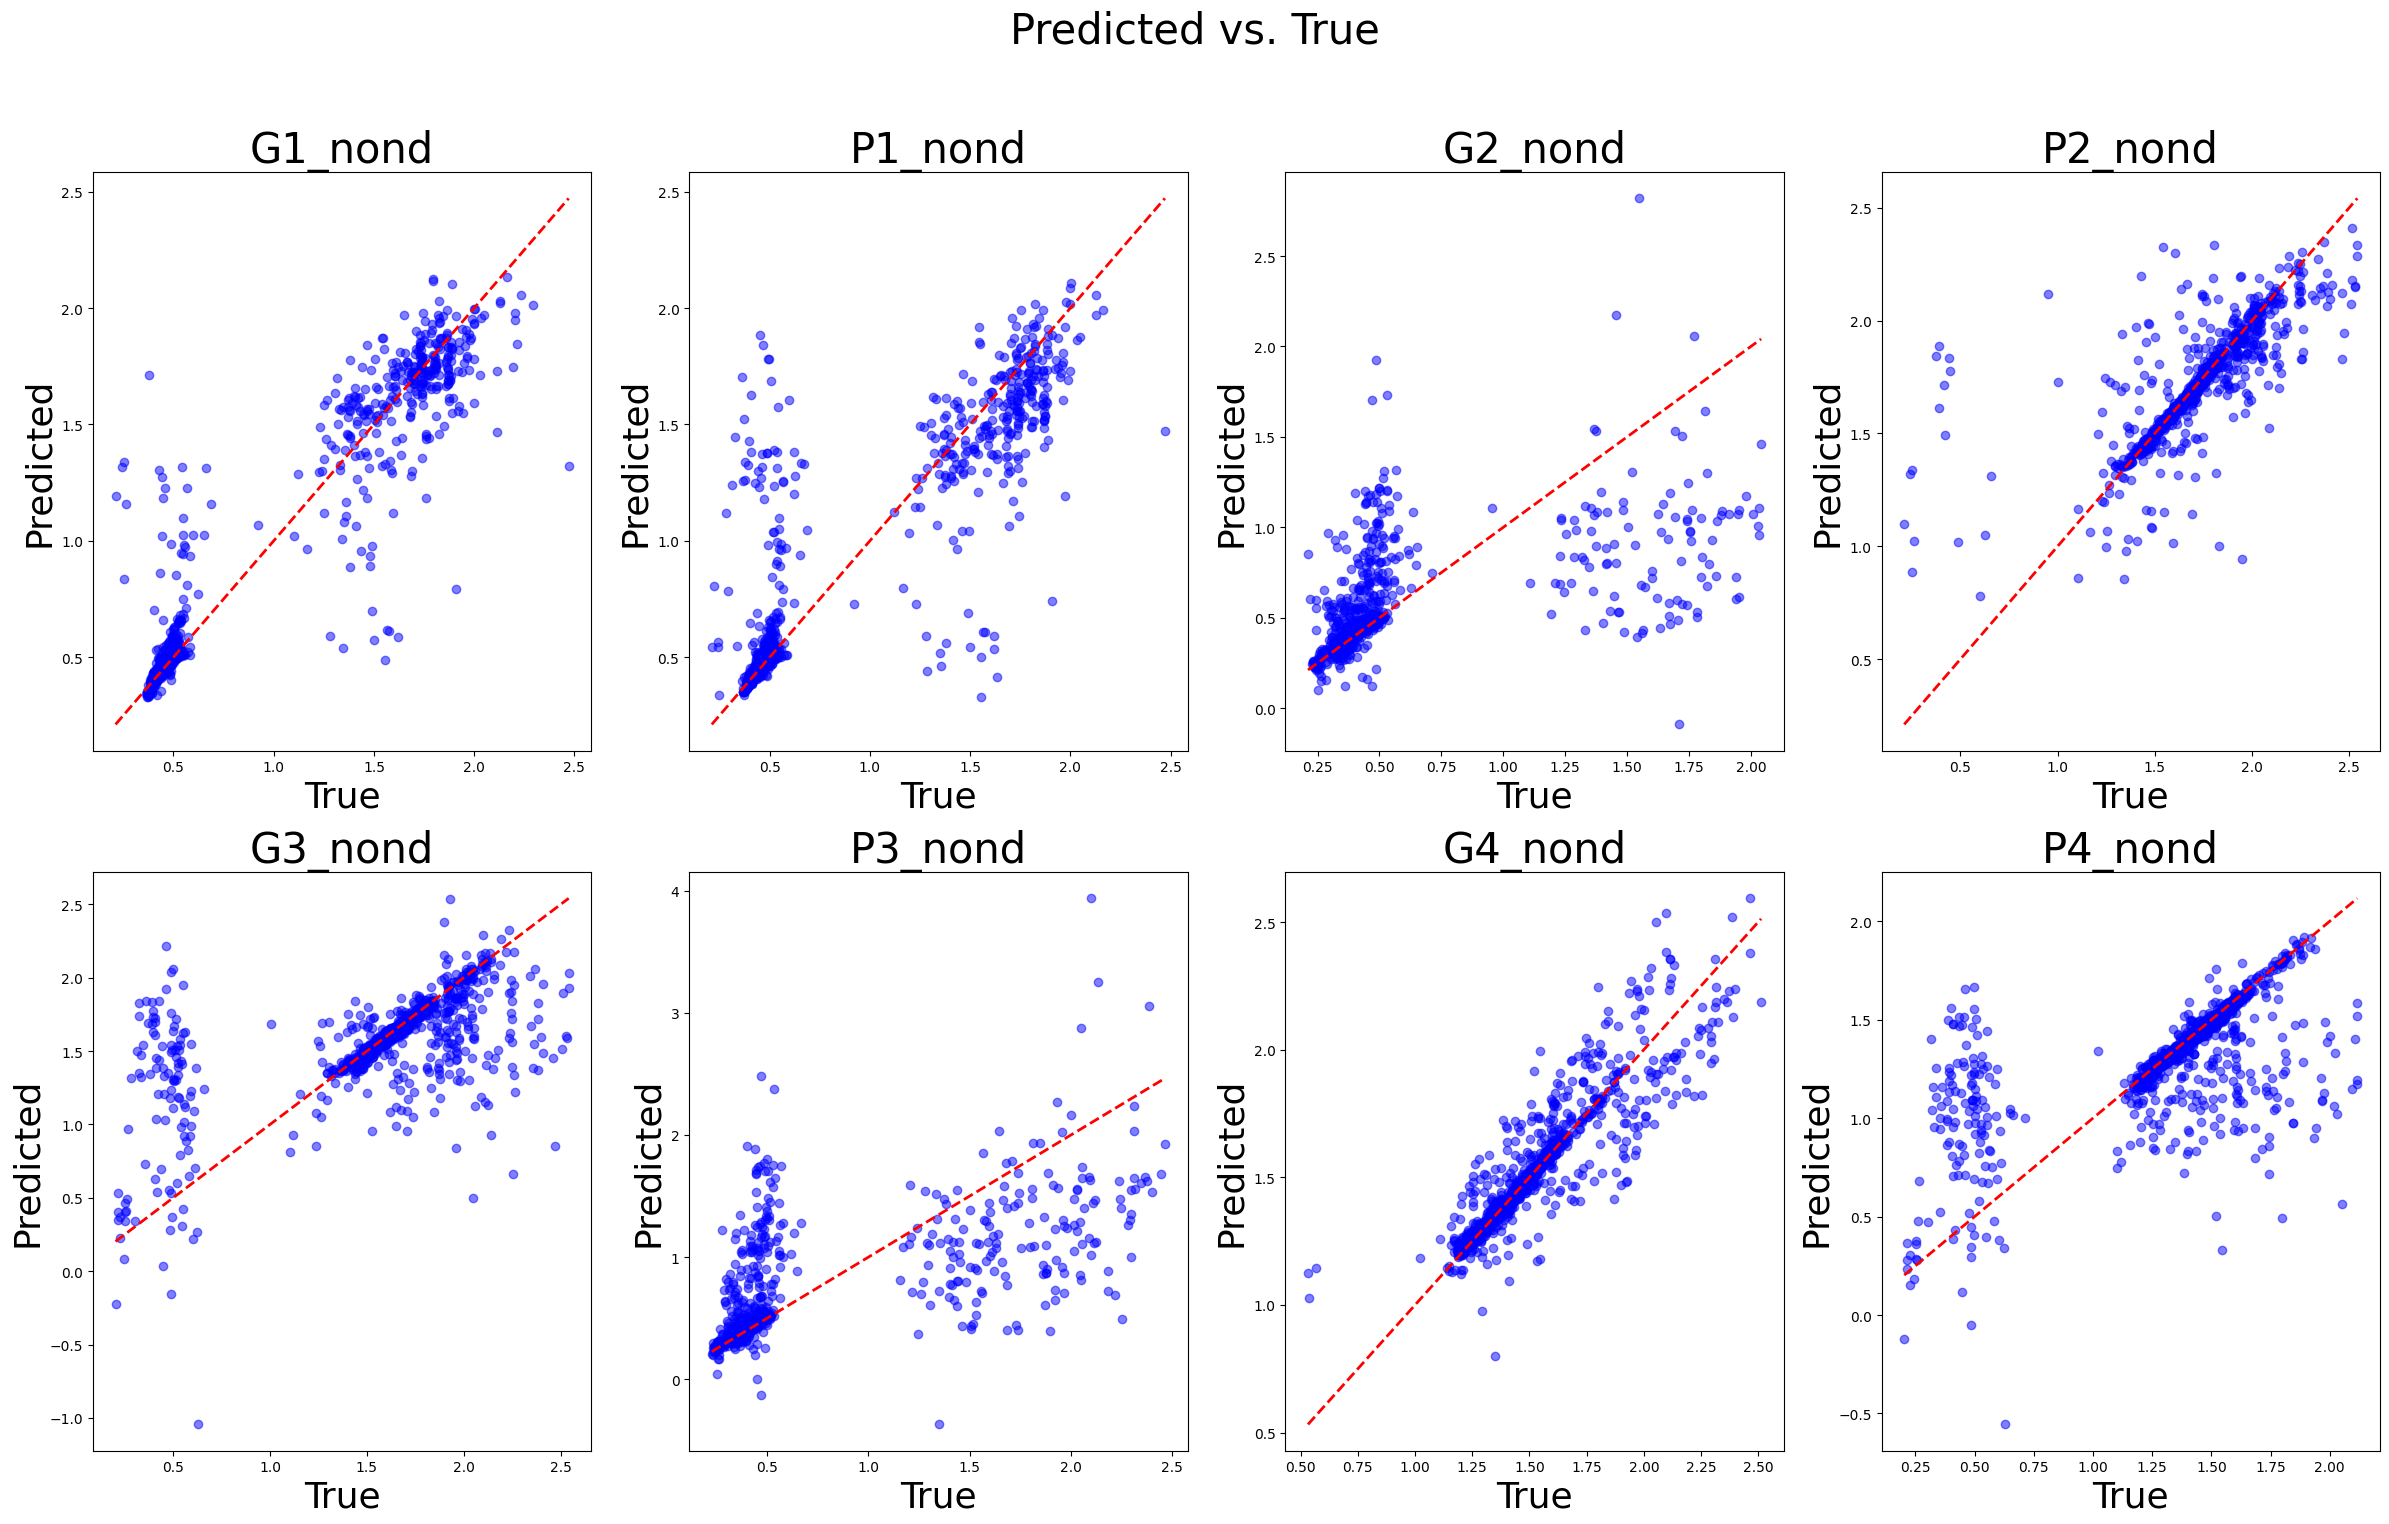

In [15]:
# Train model using dataset with 4 steady states
X_4 = nond_data_4[['n_nond', 'm_nond', 'a_nond', 'b_nond', 'theta_nond']]
y_4 = nond_data_4[['G1_nond', 'P1_nond', 'G2_nond', 'P2_nond', 'G3_nond', 'P3_nond', 'G4_nond', 'P4_nond']]
ann_model(X_4, y_4, 'model/ann_4.pt')